In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
df = pd.read_csv('dog_horse.csv')

df.head()


,Unnamed: 0,height,weight,target,type
0,0,27.0,71.0,0.0,dog
1,1,27.0,92.0,0.0,dog
2,2,32.0,47.0,0.0,dog
3,3,30.0,90.0,0.0,dog
4,4,28.0,91.0,0.0,dog


In [3]:
df.shape


(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   height      200 non-null    float64
 2   weight      200 non-null    float64
 3   target      200 non-null    float64
 4   type        200 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [5]:
#let's split

train, test = train_test_split(
    df, 
    train_size=0.8, # 80% of data to train
    test_size=0.2, # 20% of data to test
    random_state=42
)

In [6]:
target="target"
features = ["height","weight"]

In [7]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

## Classifier model

#### Model Using Entropy

In [8]:

clsr_DT_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

In [95]:
score = clsr_DT_entropy.score(X_test,y_test)
print(score*100)

97.5


#### Model Using Gini

In [96]:
clsr = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)  #max_depth=3

In [97]:
score = clsr.score(X_test,y_test)
print(score*100)

97.5


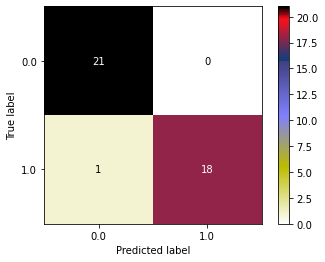

In [98]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clsr, X_test, y_test,cmap='gist_stern_r');

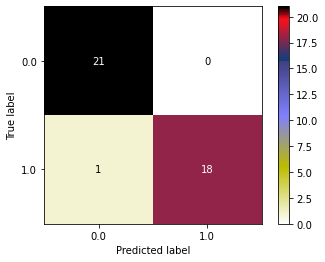

In [99]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clsr_DT_entropy, X_test, y_test,cmap='gist_stern_r');

In [100]:
clsr.classes_

array([0., 1.])

In [101]:
clsr_DT_entropy.classes_

array([0., 1.])

## Plot the tree


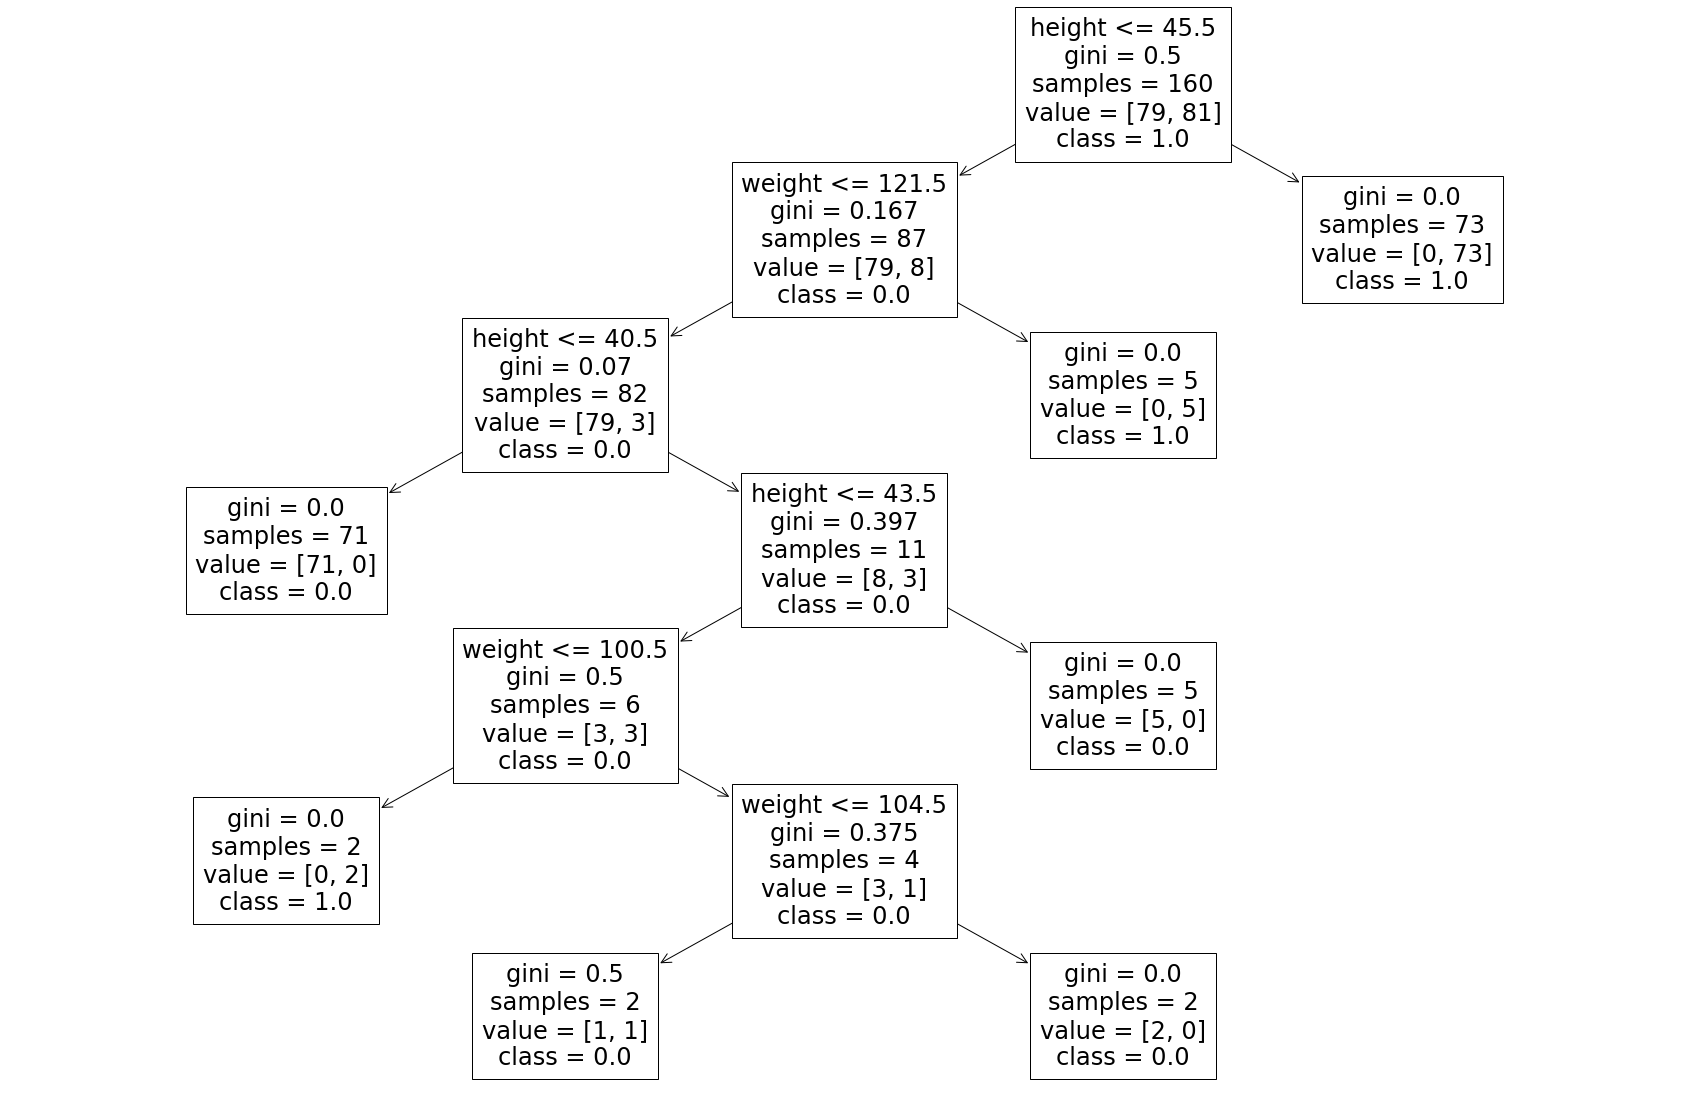

In [102]:
plt.figure(figsize=(30,20))

tree.plot_tree( clsr, feature_names=["height","weight"], # columns in same order as was trained on
    class_names=[str(x) for x in clsr.classes_] # use cl2.classes_ to find class order
);

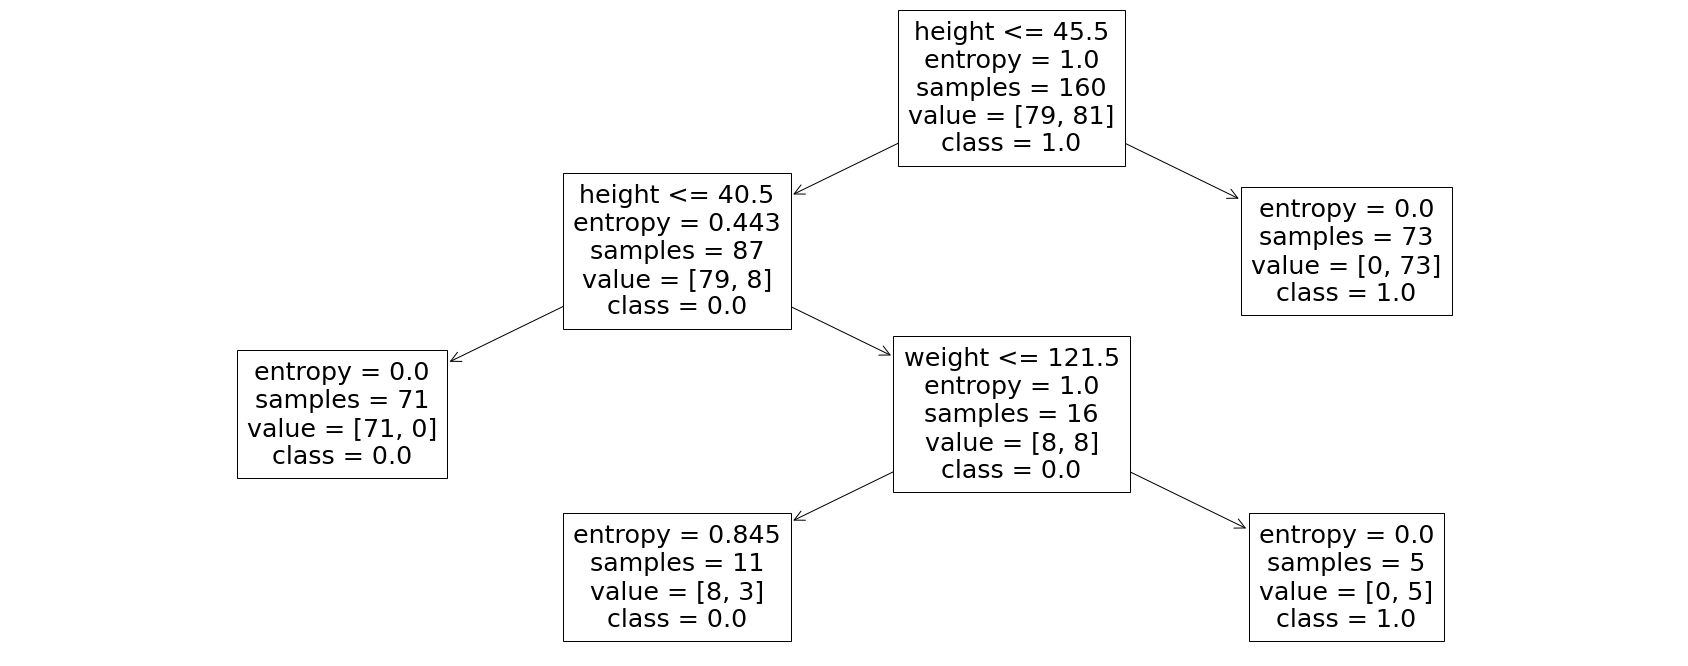

In [103]:
# Plot the tree
plt.figure(figsize=(30,12))

tree.plot_tree( clsr_DT_entropy,feature_names=["height","weight"], # columns in same order as was trained on
    class_names=[str(x) for x in clsr_DT_entropy.classes_] # use cl2.classes_ to find class order
);

In [104]:

preds = clsr_DT_entropy.predict(X_train)

# This is the accuracy on the training set --> the set using for building the model
# generally we want this to be more than 75%
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        79
         1.0       1.00      0.96      0.98        81

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.98      0.98       160



In [105]:

preds_test = clsr_DT_entropy.predict(X_test)

# This is the accuracy on the training set --> the set using for building the model
# generally we want this to be more than 75%
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        21
         1.0       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [106]:

preds = clsr.predict(X_train)

# This is the accuracy on the training set --> the set using for building the model
# generally we want this to be more than 75%
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        79
         1.0       1.00      0.99      0.99        81

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



In [107]:

preds_test = clsr.predict(X_test)

# This is the accuracy on the training set --> the set using for building the model
# generally we want this to be more than 75%
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        21
         1.0       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

